In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Stations = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

<Axes: xlabel='Date', ylabel='Inches'>

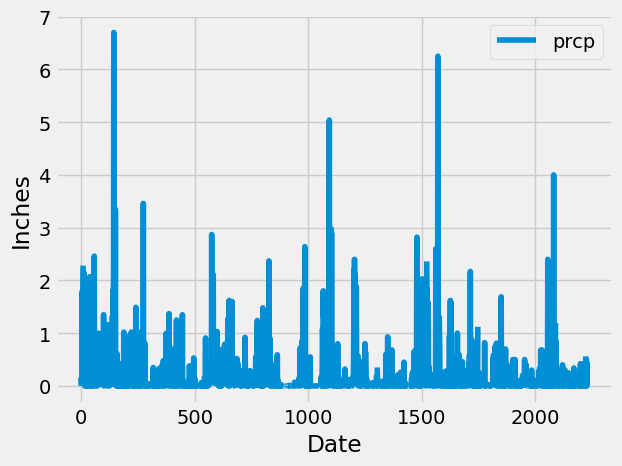

In [124]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame.from_records(results, columns = ["date", "prcp"])

# Sort the dataframe by date
data_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
data_df.plot(xlabel='Date', ylabel='Inches')

In [57]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [60]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations = session.query(Stations).count()
number_of_stations

9

In [125]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc())\
.all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [85]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_stn_data = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
.group_by(Measurement.station)\
.having(Measurement.station == 'USC00519281')\
.all()
active_stn_data

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [91]:
recent_date = session.query(Measurement.date)\
.filter(Measurement.station == 'USC00519281')\
.order_by(Measurement.date.desc())\
.first()
recent_date

('2017-08-18',)

<Axes: xlabel='Temperature', ylabel='Count'>

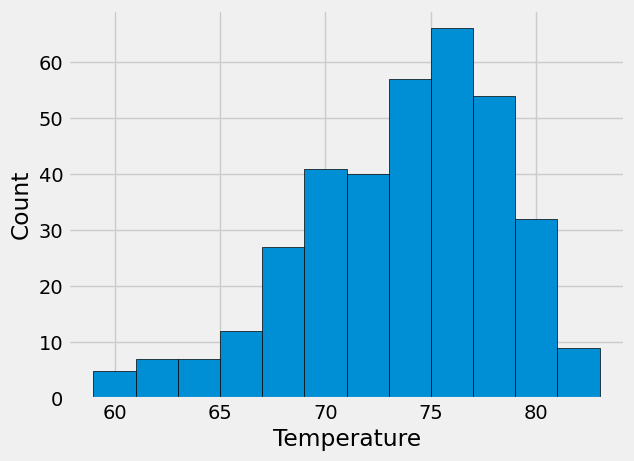

In [108]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_stn_temp_data = session.query(Measurement.tobs, )\
.filter(Measurement.station == 'USC00519281')\
.filter(Measurement.date >= '2016-08-18')\
.all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
active_stn_temp_data_df = pd.DataFrame.from_records(active_stn_temp_data,columns = ["tobs"])

# Use Pandas Plotting with Matplotlib to plot the data
active_stn_temp_data_df['tobs'].plot(kind='hist', bins=12, edgecolor='black', xlabel='Temperature', ylabel='Count')

# Close Session

In [126]:
# Close Session
session.close()